# Klasyfikacja algorytmem drzewa decyzyjnego i SVC
<br>Filip Patuła s28615, Michał Bedra s28854
<br>
<br>Import potrzebnych do zadania bibliotek

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

Ładowanych danych abalone i wstępne przygotowanie https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [27]:
headers = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
   " Viscera weight",
    "Shell weight",
    "Rings"
]
abalone_data = pd.read_csv('abalone_data.csv', header=None, names=headers)
print(abalone_data.head())

categorical_abalone_columns = abalone_data.select_dtypes(include=['object', 'category']).columns

for column in categorical_abalone_columns:
    encoder = preprocessing.LabelEncoder()
    abalone_data[column] = encoder.fit_transform(abalone_data[column])

X_abalone = abalone_data.iloc[:, :-1]
Y_abalone = abalone_data.iloc[:, -1]

x_abalone_train, x_abalone_test, y_abalone_train, y_abalone_test = train_test_split(X_abalone, Y_abalone, test_size=0.2, random_state=42)

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245   
1   M   0.350     0.265   0.090        0.2255          0.0995   
2   F   0.530     0.420   0.135        0.6770          0.2565   
3   M   0.440     0.365   0.125        0.5160          0.2155   
4   I   0.330     0.255   0.080        0.2050          0.0895   

    Viscera weight  Shell weight  Rings  
0           0.1010         0.150     15  
1           0.0485         0.070      7  
2           0.1415         0.210      9  
3           0.1140         0.155     10  
4           0.0395         0.055      7  


Trenowanie modelu drzewa decyzyjnego oraz metryk jakości klasyfikacji

C:\Users\Phili\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Phili\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Phili\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

              precision    recall  f1-score   support

           3       0.50      0.67      0.57         3
           4       0.26      0.38      0.31        13
           5       0.27      0.22      0.24        32
           6       0.23      0.27      0.25        48
           7       0.26      0.21      0.24        84
           8       0.20      0.22      0.21        99
           9       0.27      0.27      0.27       142
          10       0.29      0.24      0.27       139
          11       0.21      0.24      0.22        93
          12       0.10      0.10      0.10        51
          13       0.08      0.10      0.09        31
          14       0.07      0.08      0.07        26
          15       0.05      0.05      0.05        21
          16       0.12      0.23      0.16        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

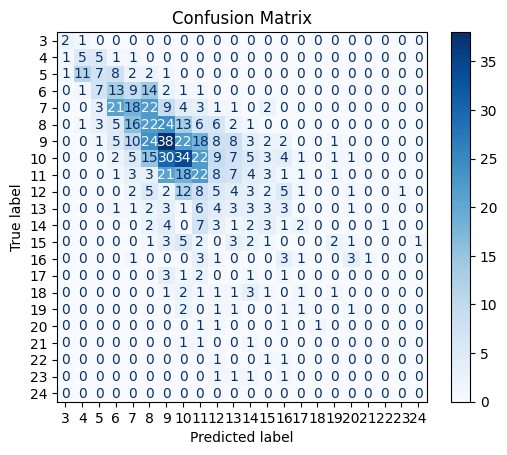

In [28]:
abalone_tree_classifier = tree.DecisionTreeClassifier()
abalone_tree_classifier = abalone_tree_classifier.fit(x_abalone_train, y_abalone_train)
test_predictions = abalone_tree_classifier.predict(x_abalone_test)
cm = metrics.confusion_matrix(y_abalone_test, test_predictions)
report = metrics.classification_report(y_abalone_test, test_predictions)
print(report)
cm_display = metrics.ConfusionMatrixDisplay.from_estimator(
    abalone_tree_classifier,
    x_abalone_test,
    y_abalone_test,
    cmap=plt.cm.Blues)
cm_display.ax_.set_title("Confusion Matrix")
plt.show()

Trenowanie modelu SVC (kernel rbf) oraz jego metryk jakości klasyfikacji

C:\Users\Phili\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Phili\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Phili\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        32
           6       0.28      0.50      0.36        48
           7       0.45      0.31      0.37        84
           8       0.36      0.41      0.38        99
           9       0.23      0.54      0.32       142
          10       0.28      0.35      0.31       139
          11       0.26      0.19      0.22        93
          12       0.00      0.00      0.00        51
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

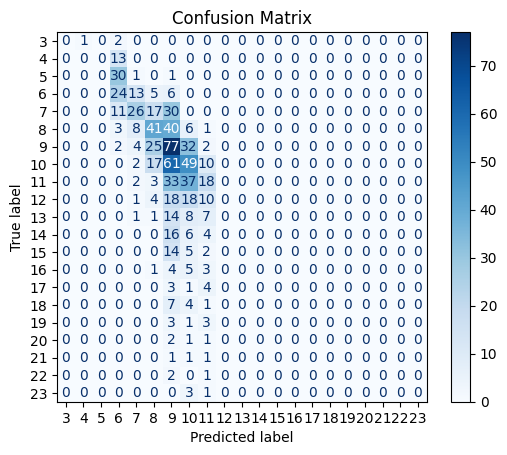

In [34]:
abalone_svc = svm.SVC(kernel='rbf')
abalone_svc = abalone_svc.fit(x_abalone_train, y_abalone_train)
svc_test_predictions = abalone_svc.predict(x_abalone_test)
report = metrics.classification_report(y_abalone_test, svc_test_predictions)
print(report)
cm_display_svc = metrics.ConfusionMatrixDisplay.from_estimator(
    abalone_svc,
    x_abalone_test,
    y_abalone_test,
    cmap=plt.cm.Blues)
cm_display_svc.ax_.set_title("Confusion Matrix")
plt.show()

### Wnioski
Dane abalone nie pozwalają na wytrenowanie modelów wystarczająco dobrze, trafność przewidywania jest dość średnia nawet dla najczęściej występującej klasy. Trochę lepiej poradził sobie model drzewa decyzyjnego, chociaż SVC ma lepszą średnią ważoną dla trafności.

## Dane car
Ładowanie danych samochodowych i wstępne przygotowanie https://archive.ics.uci.edu/dataset/19/car+evaluation

In [21]:
car_data = pd.read_csv('car.csv')
classes = ['unacceptable', 'acceptable', 'good', 'very good']
print(car_data.head())

categorical_car_columns = car_data.select_dtypes(include=['object', 'category']).columns

for column in categorical_car_columns:
    encoder = preprocessing.LabelEncoder()
    car_data[column] = encoder.fit_transform(car_data[column])

X = car_data.iloc[:, :-1]
Y = car_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


Trenowanie modelu drzewa decyzyjnego, prezentacja wytrenowanego modelu oraz jego metryk jakości klasyfikacji

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        83
           1       0.45      0.82      0.58        11
           2       0.96      0.99      0.97       235
           3       0.81      1.00      0.89        17

    accuracy                           0.92       346
   macro avg       0.79      0.88      0.82       346
weighted avg       0.93      0.92      0.92       346



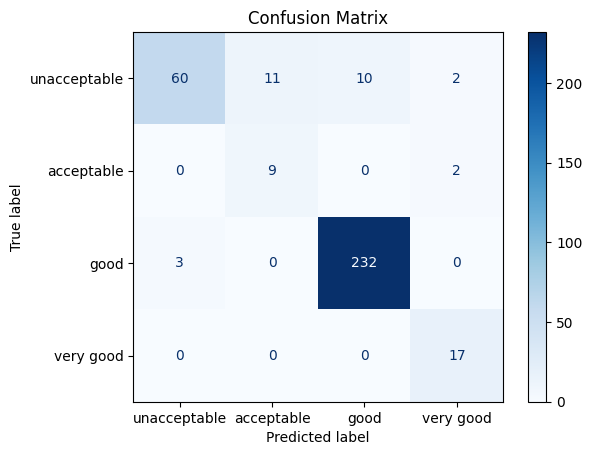

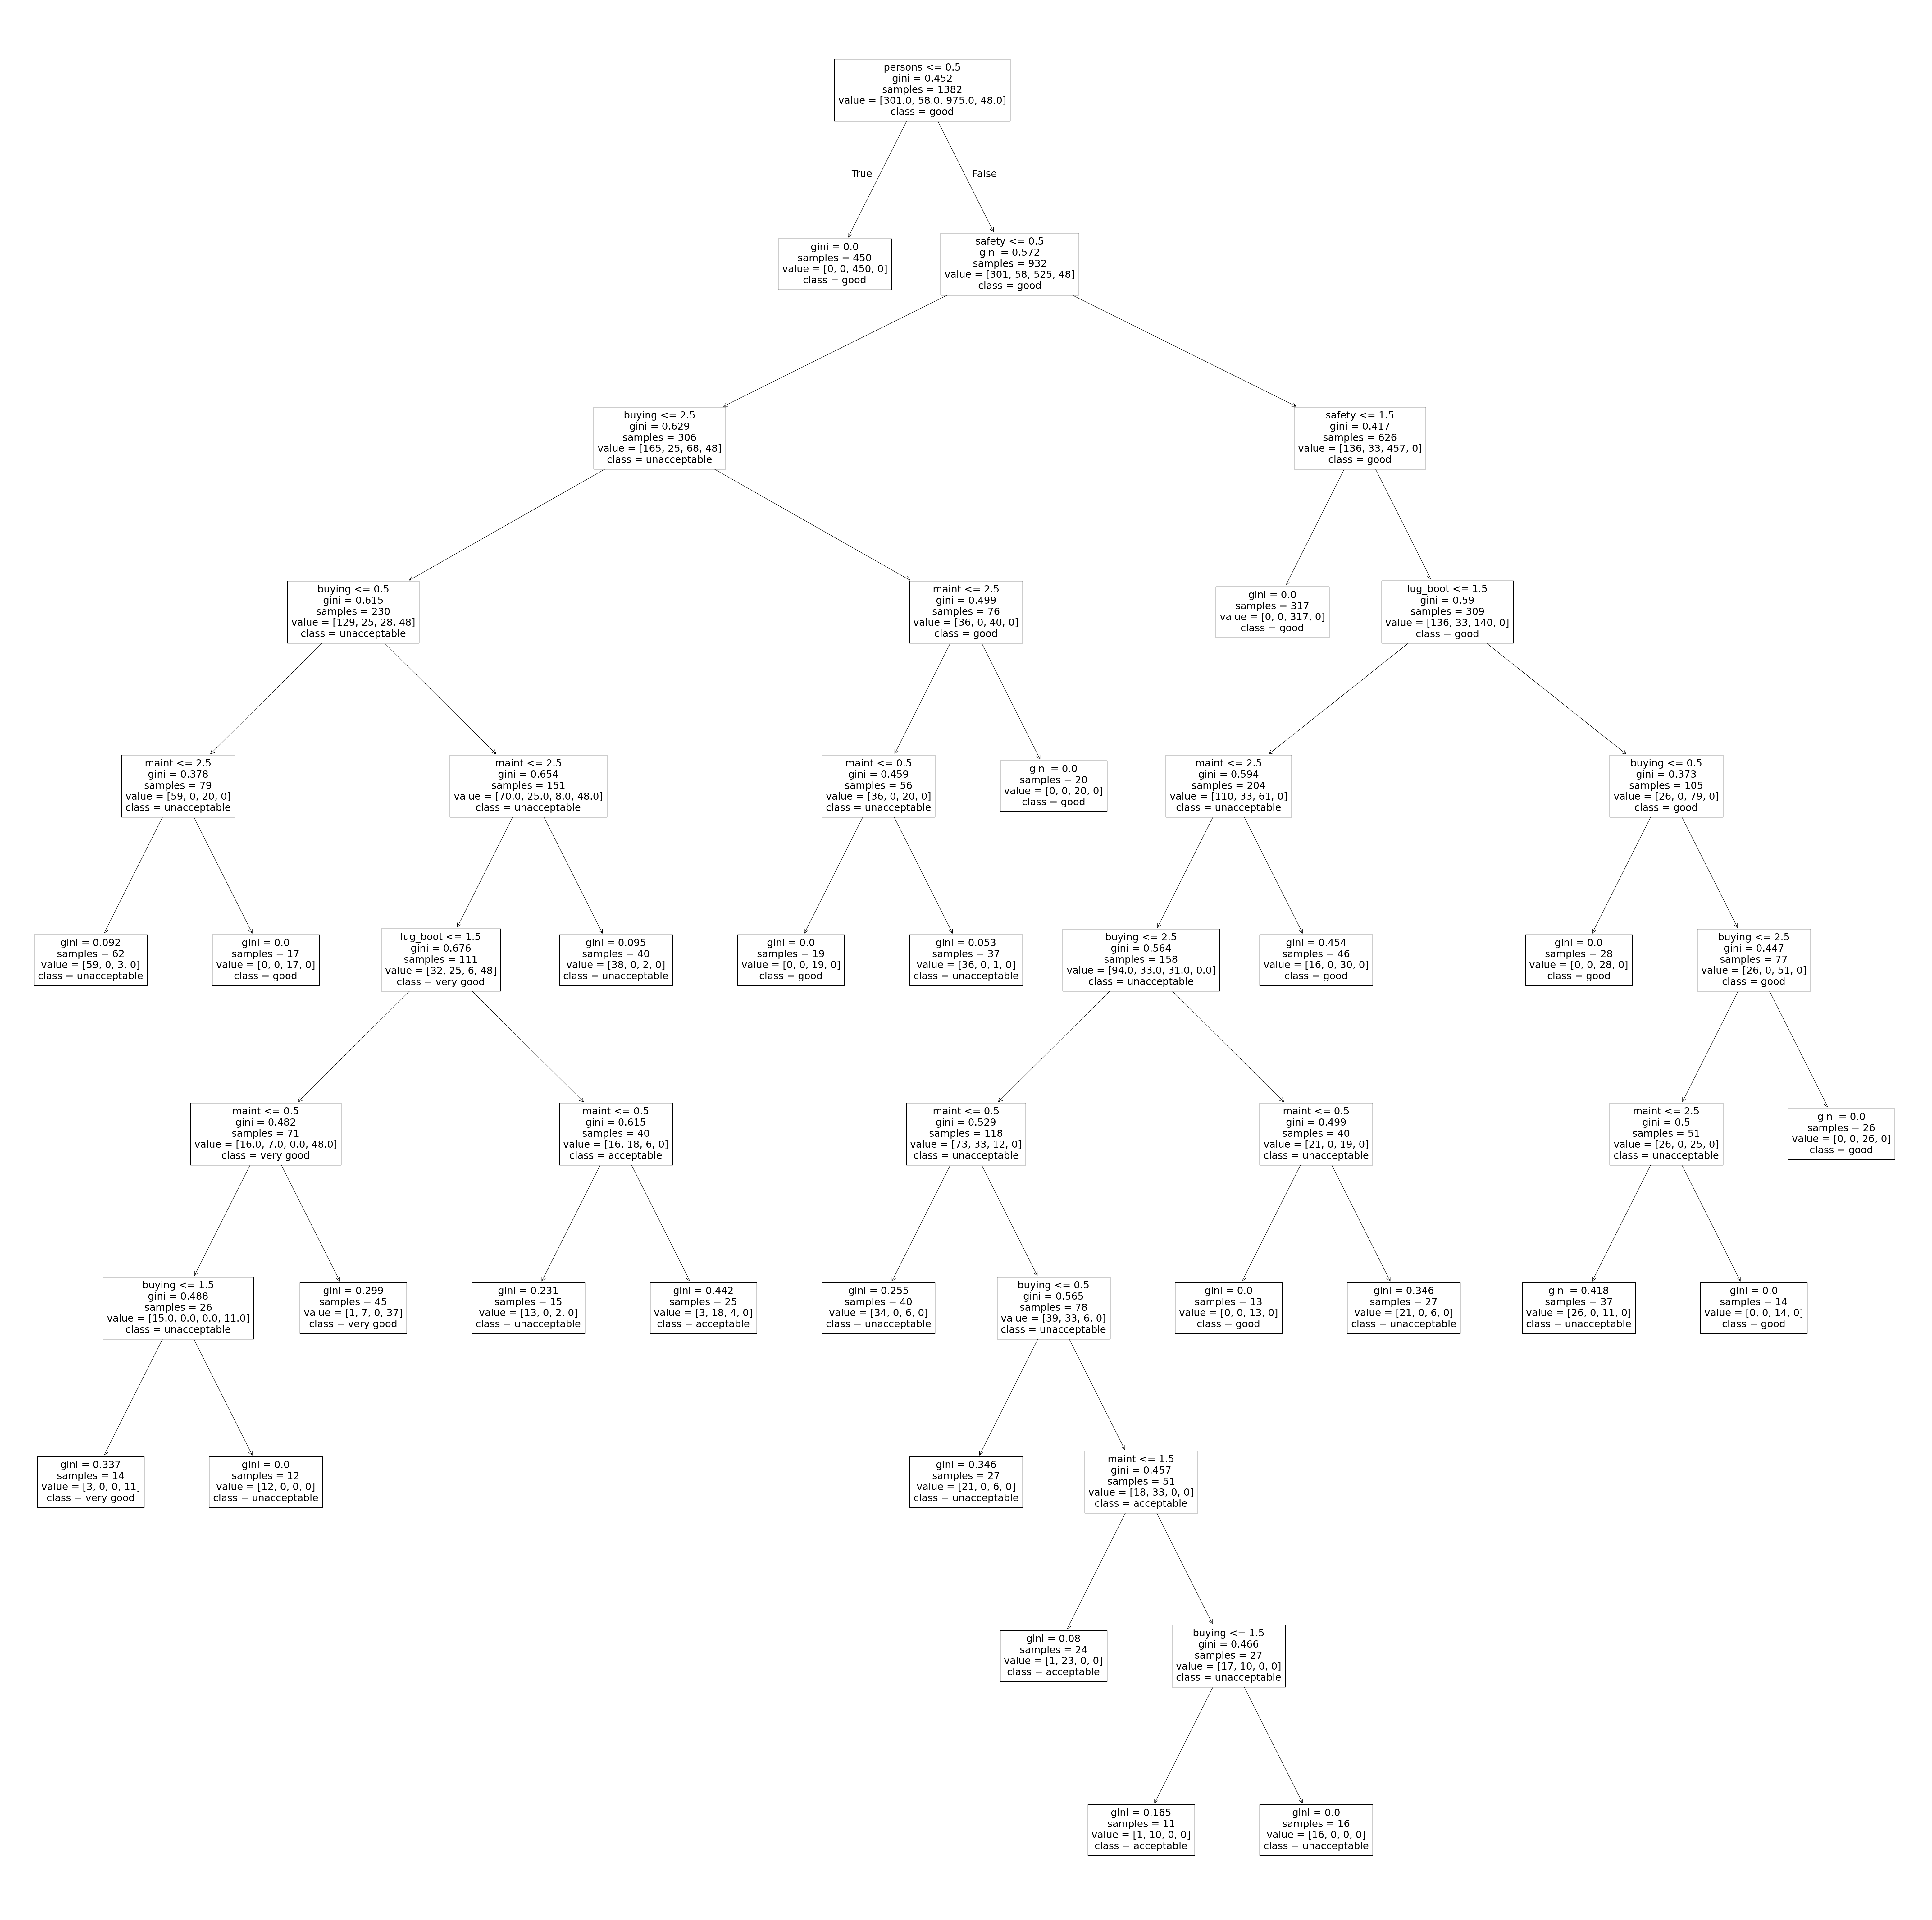

In [22]:
tree_classifier = tree.DecisionTreeClassifier(ccp_alpha=0.005)
tree_classifier = tree_classifier.fit(x_train, y_train)
test_predictions = tree_classifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, test_predictions)
report = metrics.classification_report(y_test, test_predictions)
print(report)
cm_display = metrics.ConfusionMatrixDisplay.from_estimator(
    tree_classifier,
    x_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues)
cm_display.ax_.set_title("Confusion Matrix")
plt.show()

plt.figure(figsize=(80, 80))
tree.plot_tree(decision_tree=tree_classifier, feature_names=car_data.columns[:-1], class_names=classes)
plt.show()


Trenowanie modelu SVC (kernel rbf), prezentacja modelu oraz jego metryk jakości klasyfikacji

              precision    recall  f1-score   support

           0       0.99      0.88      0.93        83
           1       0.59      0.91      0.71        11
           2       0.99      1.00      0.99       235
           3       0.94      0.94      0.94        17

    accuracy                           0.97       346
   macro avg       0.88      0.93      0.89       346
weighted avg       0.97      0.97      0.97       346



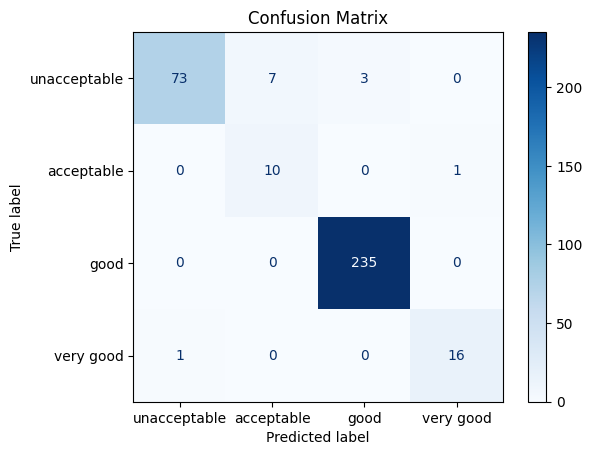

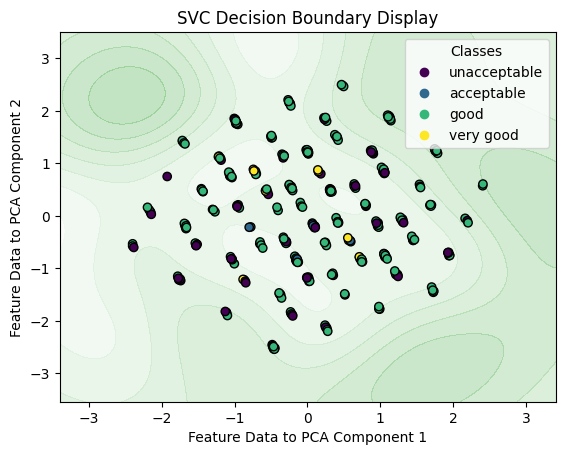

In [23]:
svc = svm.SVC(kernel='rbf')
svc = svc.fit(x_train, y_train)
svc_test_predictions = svc.predict(x_test)
report = metrics.classification_report(y_test, svc_test_predictions)
print(report)
cm_display_svc = metrics.ConfusionMatrixDisplay.from_estimator(
    svc,
    x_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues)
cm_display_svc.ax_.set_title("Confusion Matrix")
plt.show()
pca = PCA(n_components=2)
train_x_2d = pca.fit_transform(x_train)
test_x_2d = pca.transform(x_test)

svc_model_2d = svm.SVC(
    kernel=svc.kernel,
    C=svc.C,
    gamma=svc.gamma,
    probability=False
)
svc_model_2d.fit(train_x_2d, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    svc_model_2d,
    test_x_2d,
    xlabel="Feature Data to PCA Component 1",
    ylabel="Feature Data to PCA Component 2",
    alpha=0.3
)

scatter = plt.scatter(test_x_2d[:, 0], test_x_2d[:, 1], c=y_test, edgecolor='black', cmap="viridis", label="Test Data")
handles, labels = scatter.legend_elements()
plt.legend(handles, classes, title="Classes")
plt.title("SVC Decision Boundary Display")

plt.show()


## Wnioski
Model SVC biorąc pod uwagę średnią micro i ważoną poradził sobie lepiej od modelu drzewa decyzyjnego. Natomiast patrząc na macierze pomyłek i wartości recall można uznać, że lepszy w przypadku tych danych okazał się model drzewa decyzyjnego (poprawna klasyfikacja wszystkich klas very good i mniej pomyłek z przewidywaniem klasy unaaceptable na klasę good, mniejsza liczba pomyłek w przypadku klasy acceptable). W przypadku tych danych model drzewa decyzyjnego poradził sobie również bardzo dobrze. Najgorzej wypada klasyfikacja klasy samochodu: acceptable, ze względu na małą ilość danych dla tej klasy.




Trenowanie modelu SVC z różnymi parametrami (kernel rbf), prezentacja metryk jakości klasyfikacji


SVC rbf C=0.8 custom class weights
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        83
           1       0.62      0.73      0.67        11
           2       0.98      0.99      0.99       235
           3       0.94      0.88      0.91        17

    accuracy                           0.95       346
   macro avg       0.86      0.87      0.87       346
weighted avg       0.95      0.95      0.95       346



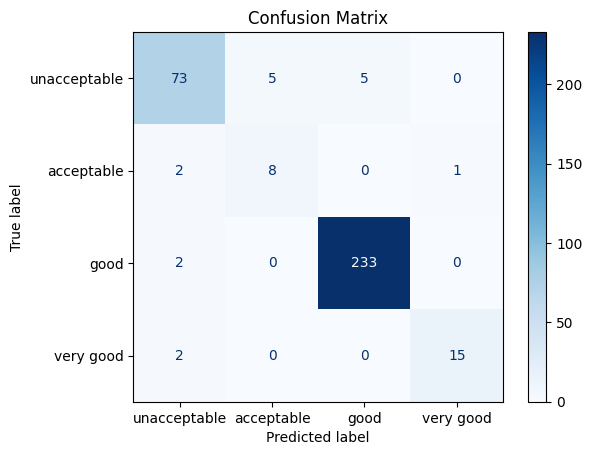

SVC rbf C=0.8 balanced
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        83
           1       0.36      0.91      0.51        11
           2       0.99      0.85      0.91       235
           3       0.85      1.00      0.92        17

    accuracy                           0.84       346
   macro avg       0.72      0.89      0.77       346
weighted avg       0.89      0.84      0.86       346



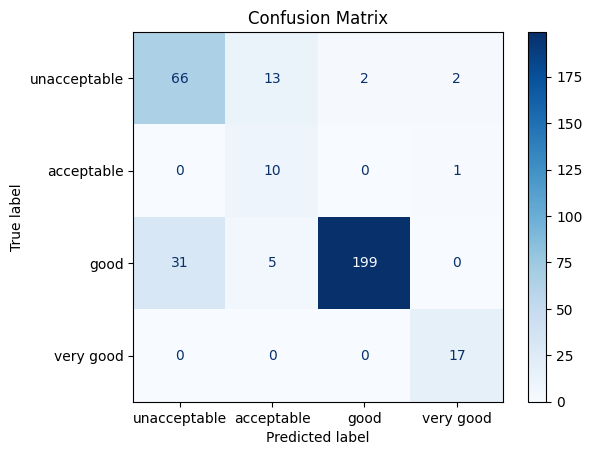

SVC rbf C=0.6 balanced
              precision    recall  f1-score   support

           0       0.61      0.80      0.69        83
           1       0.33      0.91      0.49        11
           2       0.99      0.79      0.88       235
           3       0.85      1.00      0.92        17

    accuracy                           0.81       346
   macro avg       0.70      0.87      0.74       346
weighted avg       0.87      0.81      0.82       346



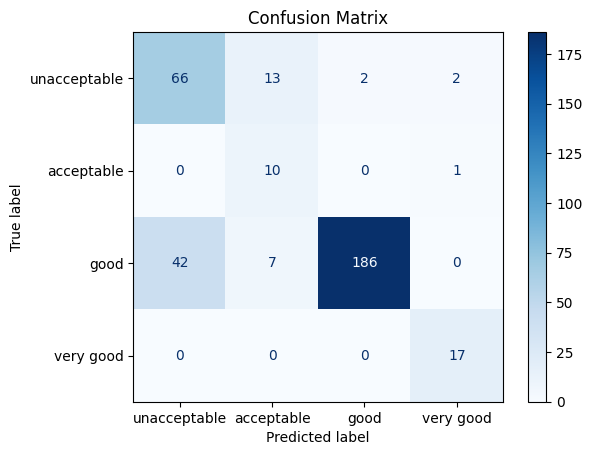

In [24]:
svc_rbf_c_0_8 = svm.SVC(kernel='rbf', C=0.8, class_weight={0: 2.0, 1: 1.5, 2: 1.5, 3: 1.9})
svc_rbf_c_0_8 = svc_rbf_c_0_8.fit(x_train, y_train)
svc_test_predictions_c_0_8 = svc_rbf_c_0_8.predict(x_test)
report = metrics.classification_report(y_test, svc_test_predictions_c_0_8)
print("SVC rbf C=0.8 custom class weights")
print(report)
cm_display_svc_c_0_8 = metrics.ConfusionMatrixDisplay.from_estimator(
    svc_rbf_c_0_8,
    x_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues)
cm_display_svc_c_0_8.ax_.set_title("Confusion Matrix")
plt.show()

svc_rbf_c_0_8_balanced = svm.SVC(kernel='rbf', C=0.8, class_weight='balanced')
svc_rbf_c_0_8_balanced = svc_rbf_c_0_8_balanced.fit(x_train, y_train)
svc_test_predictions_c_0_8_balanced = svc_rbf_c_0_8_balanced.predict(x_test)
report = metrics.classification_report(y_test, svc_test_predictions_c_0_8_balanced)
print("SVC rbf C=0.8 balanced")
print(report)
cm_display_svc_c_0_8_balanced = metrics.ConfusionMatrixDisplay.from_estimator(
    svc_rbf_c_0_8_balanced,
    x_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues)
cm_display_svc_c_0_8_balanced.ax_.set_title("Confusion Matrix")
plt.show()

svc_rbf_c_0_6_balanced = svm.SVC(kernel='rbf', C=0.6, class_weight='balanced')
svc_rbf_c_0_6_balanced = svc_rbf_c_0_6_balanced.fit(x_train, y_train)
svc_test_predictions_c_0_6 = svc_rbf_c_0_6_balanced.predict(x_test)
report = metrics.classification_report(y_test, svc_test_predictions_c_0_6)
print("SVC rbf C=0.6 balanced")
print(report)
cm_display_svc_c_0_6_balanced = metrics.ConfusionMatrixDisplay.from_estimator(
    svc_rbf_c_0_6_balanced,
    x_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues)
cm_display_svc_c_0_6_balanced.ax_.set_title("Confusion Matrix")
plt.show()

Trenowanie modelu SVC z różnymi parametrami (kernel sigmoid), prezentacja metryk jakości klasyfikacji

SVC poly C=0.8
              precision    recall  f1-score   support

           0       0.77      0.67      0.72        83
           1       0.86      0.55      0.67        11
           2       0.88      0.96      0.92       235
           3       0.90      0.53      0.67        17

    accuracy                           0.86       346
   macro avg       0.85      0.68      0.74       346
weighted avg       0.86      0.86      0.85       346



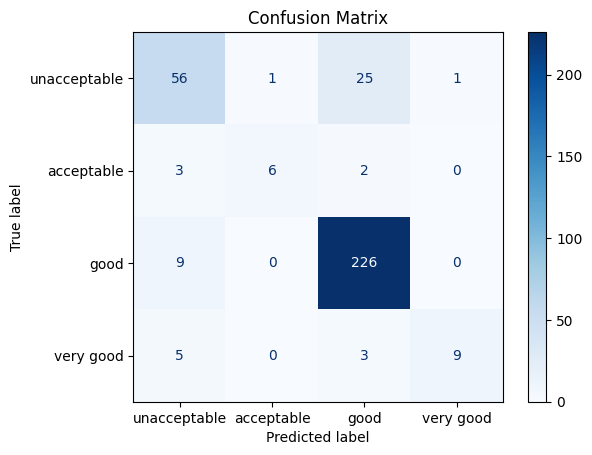

SVC poly C=0.8 balanced
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        83
           1       0.42      0.91      0.57        11
           2       0.99      0.81      0.89       235
           3       0.41      0.94      0.57        17

    accuracy                           0.81       346
   macro avg       0.63      0.85      0.69       346
weighted avg       0.87      0.81      0.82       346



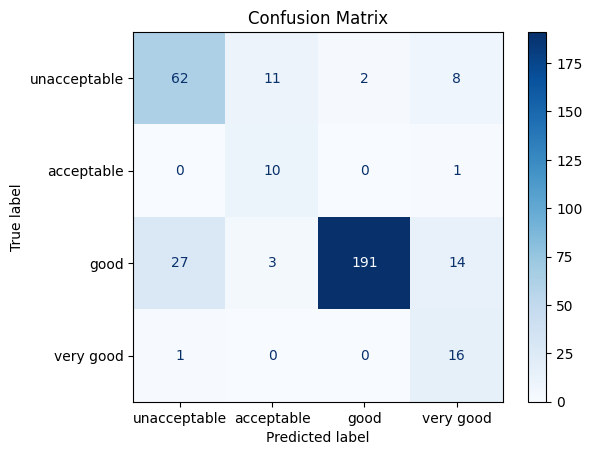

SVC poly C=0.6 balanced
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        83
           1       0.38      0.91      0.54        11
           2       0.99      0.81      0.89       235
           3       0.40      0.94      0.56        17

    accuracy                           0.80       346
   macro avg       0.61      0.85      0.67       346
weighted avg       0.87      0.80      0.82       346



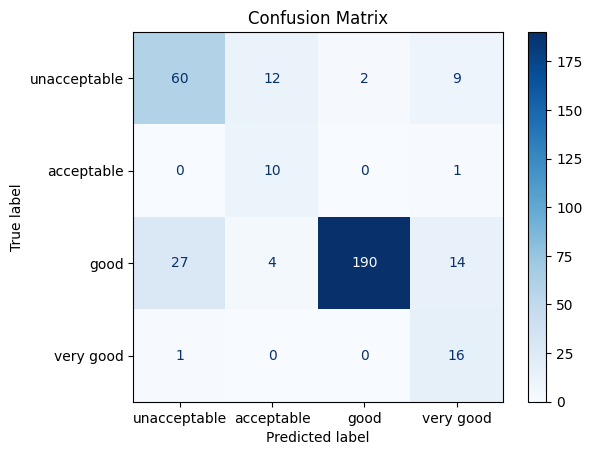

In [25]:
svc_poly_c_0_8 = svm.SVC(kernel='poly', C=0.8)
svc_poly_c_0_8 = svc_poly_c_0_8.fit(x_train, y_train)
svc_test_predictions_s_c_0_8 = svc_poly_c_0_8.predict(x_test)
report = metrics.classification_report(y_test, svc_test_predictions_s_c_0_8)
print("SVC poly C=0.8")
print(report)
cm_display_svc_p_c_0_8 = metrics.ConfusionMatrixDisplay.from_estimator(
    svc_poly_c_0_8,
    x_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues)
cm_display_svc_p_c_0_8.ax_.set_title("Confusion Matrix")
plt.show()

svc_poly_c_0_8_balanced = svm.SVC(kernel='poly', C=0.8, class_weight='balanced')
svc_poly_c_0_8_balanced = svc_poly_c_0_8_balanced.fit(x_train, y_train)
svc_test_predictions_p_c_0_8_balanced = svc_poly_c_0_8_balanced.predict(x_test)
report = metrics.classification_report(y_test, svc_test_predictions_p_c_0_8_balanced)
print("SVC poly C=0.8 balanced")
print(report)
cm_display_svc_poly_c_0_8_balanced = metrics.ConfusionMatrixDisplay.from_estimator(
    svc_poly_c_0_8_balanced,
    x_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues)
cm_display_svc_poly_c_0_8_balanced.ax_.set_title("Confusion Matrix")
plt.show()

svc_poly_c_0_6_balanced = svm.SVC(kernel='poly', C=0.6, class_weight='balanced')
svc_poly_c_0_6_balanced = svc_poly_c_0_6_balanced.fit(x_train, y_train)
svc_test_predictions_poly_c_0_6 = svc_poly_c_0_6_balanced.predict(x_test)
report = metrics.classification_report(y_test, svc_test_predictions_poly_c_0_6)
print("SVC poly C=0.6 balanced")
print(report)
cm_display_svc_poly_c_0_6_balanced = metrics.ConfusionMatrixDisplay.from_estimator(
    svc_poly_c_0_6_balanced,
    x_test,
    y_test,
    display_labels=classes,
    cmap=plt.cm.Blues)
cm_display_svc_poly_c_0_6_balanced.ax_.set_title("Confusion Matrix")
plt.show()

## Wnioski z użycia różnych kernel function
W zależności od użycia różnych kernel function początkowy podział klasowy modelu wygląda inaczej, podział klas przebiega w różnych miejscach na płaszczyźnie danych. W wyniku zmiany parametru C na mniejszą wartość niż domyślna, podział klas jest mniej resktrykcyjny i bardziej rozmyty, co w przypadku tych danych przynosi pewne korzyści po drobnym zmniejszeniu wartości tego parametru. Zmiana wagowa klas czy to ręcznie przypisana czy wyliczona w przypadku użycia opcji 'balanced' pozwala na zmniejszenie wpływu na model danych o klasie z największą reprezentacją, szczególnie kiedy ilość danych należących do różnych klas jest nieproporcjonalna (mamy nadreprezentację danych o określonej klasie i małą próbę danych o innej klasie). Dla tych danych najlepiej sprawdził się kernel gaussowski rbf o wysokim współczynniku C i ręcznie dobranych wagach dla poszczególnych klas (0: 2.0, 1: 1.5, 2: 1.5, 3: 1.9).
